<a href="https://colab.research.google.com/github/M-PRERNA/Time-Series-Forecasting-with-TensorFlow/blob/main/Naive_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive forecasting
 -  The main method we are focusing on is known as **naïve** because there are no calculations or formulas, only an assertion of the actual sales numbers. In some cases, naïve forecasting can accurately predict situations, while others can be problematic because it considers only the previous period to forecast the next period. Thus, historical sales data is the foremost requirement for naïve forecasting and factors such as seasonality are not considered. Oftentimes, salespeople will use naïve forecasting to make goals to make sure they are always either improving or maintaining their contribution to the company.
 - Naïve forecasting is the most basic of forecasting methods used for predicting accurate sales based on historical data.

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Trend and Seasonality

plot function

In [2]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [3]:
# trend pattern
def trend(time,slope=0):
  return slope*time
  
# seasonality
def seasonal_pattern(season_time):
  return np.where(
      season_time < 0.4,
      np.cos(season_time* 2* np.pi),
      1/np.exp(3*season_time))
  
def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time+phase) % period)/period
  return amplitude * seasonal_pattern(season_time)

# white-noise
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level


adding the necessary values

In [5]:
time = np.arange(4*365 + 1)

slope = 0.5
baseline = 10
amplitude = 40
series = baseline + trend(time, slope)
series += seasonality(time, period=365, amplitude = amplitude)
noise_level = 5
noise = white_noise(time, noise_level, seed=42)
series += noise



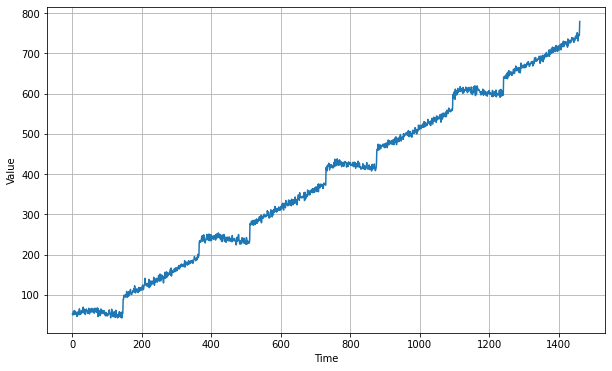

In [6]:
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

All right, this looks realistic enough for now. Let's try to forecast it. We will split it into two periods: the training period and the validation period (in many cases, you would also want to have a test period). The split will be at time step 1000.

In [7]:
split_time = 1000

time_train = time[:split_time]
time_valid = time[split_time:]
x_train = series[:split_time]
x_valid = series[split_time:]

## Naive Forecast

In [8]:
naive_forecast = series[split_time -1 :-1]

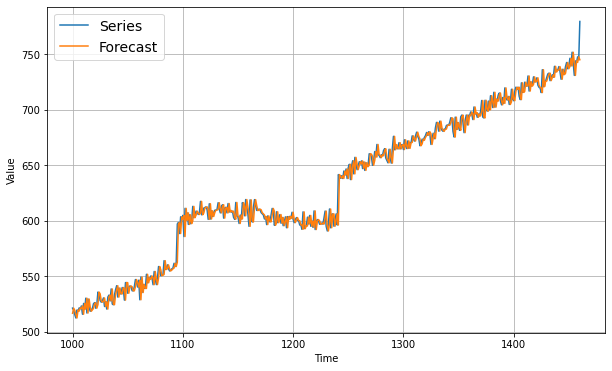

In [9]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, naive_forecast, label="Forecast")

Let's zoom in on the start of the validation period:

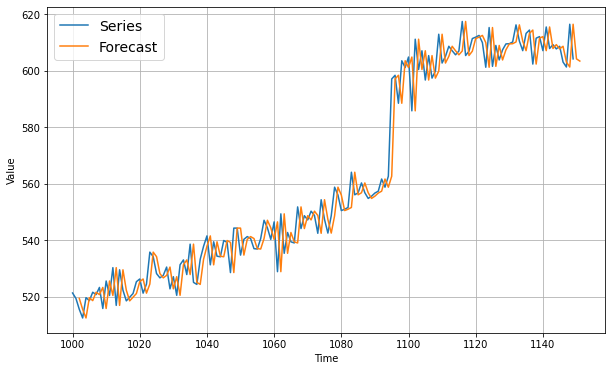

In [11]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150, label="Series")
plot_series(time_valid, naive_forecast, start=2, end=152, label="Forecast")

You can see that the naive forecast lags 1 step behind the time series.

Now let's compute the mean absolute error between the forecasts and the predictions in the validation period:

In [12]:
errors = naive_forecast - x_valid
abs_errors = np.abs(errors)
mae = abs_errors.mean()
mae

5.934147055013669

That's our baseline, now let's try a moving average.